Backpropagation is an algorithm for supervised learning of artificial neural networks that uses the gradient descent method to minimize the cost function. It searches for optimal weights that optimize the mean-squared distance between the predicted and actual labels.

In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

C:\Users\ILLUMI\AppData\Local\Temp\ipykernel_17328\2780180576.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Function to load ring datasets
def load_ring_dataset(filename):
    df = pd.read_csv(filename, sep="\t", header=None)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

In [4]:
# Function to create the neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [5]:
def load_bank_dataset(filename):
    data = pd.read_csv(filename, sep=';')
    label_encoders = {}
    for column in data.columns:
        if data[column].dtype == object:
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
            label_encoders[column] = le
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y, label_encoders

In [6]:
# Loading ring datasets
X_separable, y_separable = load_ring_dataset('A2-ring-separable.txt')
X_merged, y_merged = load_ring_dataset('A2-ring-merged.txt')
X_test_ring, y_test_ring = load_ring_dataset('A2-ring-test.txt')

In [7]:
# Training and evaluating for ring-separable dataset
model_separable = create_model(X_separable.shape[1])
model_separable.fit(X_separable, y_separable, epochs=150, batch_size=10, verbose=0)
y_pred_separable = (model_separable.predict(X_test_ring) > 0.5).astype("int32")
print("Classification Report for Ring Separable Dataset:")
print(classification_report(y_test_ring, y_pred_separable))

Classification Report for Ring Separable Dataset:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5333
           1       0.98      1.00      0.99      4667

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [8]:
# Training and evaluating for ring-merged dataset
model_merged = create_model(X_merged.shape[1])
model_merged.fit(X_merged, y_merged, epochs=150, batch_size=10, verbose=0)
y_pred_merged = (model_merged.predict(X_test_ring) > 0.5).astype("int32")
print("Classification Report for Ring Merged Dataset:")
print(classification_report(y_test_ring, y_pred_merged))

Classification Report for Ring Merged Dataset:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      5333
           1       0.92      0.96      0.94      4667

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [9]:
# Loading bank dataset
X_bank, y_bank, encoders = load_bank_dataset('bank-additional.csv')
train_size = int(0.8 * len(X_bank))
X_train_bank, X_test_bank = X_bank[:train_size], X_bank[train_size:]
y_train_bank, y_test_bank = y_bank[:train_size], y_bank[train_size:]

In [10]:
# Ensure data is in the correct format
X_train_bank = X_train_bank.astype('float32')
y_train_bank = y_train_bank.astype('int32')

In [11]:
# Training for bank dataset
model_bank = create_model(X_train_bank.shape[1])
model_bank.fit(X_train_bank, y_train_bank, epochs=50, batch_size=10, verbose=0)
y_pred_bank = (model_bank.predict(X_test_bank) > 0.5).astype("int32")
print("Classification Report for Bank Marketing Dataset:")
print(classification_report(y_test_bank, y_pred_bank))

Classification Report for Bank Marketing Dataset:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       744
           1       0.37      0.56      0.45        80

    accuracy                           0.86       824
   macro avg       0.66      0.73      0.68       824
weighted avg       0.89      0.86      0.88       824



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [13]:
#ROC Curve
def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

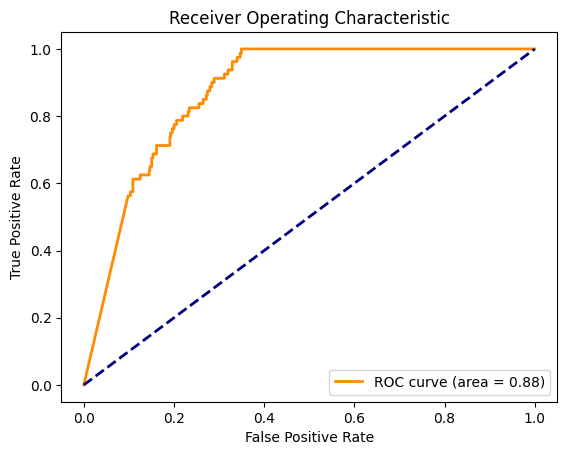

In [14]:
# Plot ROC Curve
y_scores_bank = model_bank.predict(X_test_bank).ravel()
plot_roc_curve(y_test_bank, y_scores_bank)

In [15]:
def load_universal_bank_dataset(filename):
    data = pd.read_csv(filename)
    label_encoders = {}
    for column in data.columns[:-1]:
        if data[column].dtype == object:
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
            label_encoders[column] = le
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y, label_encoders

In [16]:
file_path = 'UniversalBank.csv'  
X_bank, y_bank, _ = load_universal_bank_dataset(file_path)

In [17]:
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [18]:
# Splitting the dataset into training and testing sets
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(X_bank, y_bank, test_size=0.3, random_state=42)

In [19]:
# Training and evaluating for UniversalBank dataset
model_bank = create_model(X_train_bank.shape[1])
model_bank.fit(X_train_bank, y_train_bank, epochs=50, batch_size=10, verbose=0)
y_pred_bank = (model_bank.predict(X_test_bank) > 0.5).astype("int32")
print("Classification Report for UniversalBank Dataset:")
print(classification_report(y_test_bank, y_pred_bank))

Classification Report for UniversalBank Dataset:
              precision    recall  f1-score   support

           0       0.72      1.00      0.83      1073
           1       0.00      0.00      0.00       427

    accuracy                           0.72      1500
   macro avg       0.36      0.50      0.42      1500
weighted avg       0.51      0.72      0.60      1500



c:\users\illumi\pycharmprojects\finalproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\illumi\pycharmprojects\finalproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\users\illumi\pycharmprojects\finalproject\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold

def create_bp_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) 

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def cross_validate_bp_model(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits)
    accuracies = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        model = create_bp_model(X_train.shape[1])
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        _, accuracy = model.evaluate(X_val, y_val, verbose=0)
        accuracies.append(accuracy)

    return np.mean(accuracies)

def evaluate_on_test_set(model, X_test, y_test):
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

In [26]:
cv_error_bp = cross_validate_bp_model(X_bank, y_bank)

bp_model = create_bp_model(X_bank.shape[1])
bp_model.fit(X_bank, y_bank, epochs=10, batch_size=32, verbose=0)
test_error_bp = evaluate_on_test_set(bp_model, X_train_bank, y_train_bank)

print("BP Cross-Validation Error:", cv_error_bp)
print("BP Test Set Error:", test_error_bp)

BP Cross-Validation Error: 0.6216000020503998
BP Test Set Error: 0.7020000219345093


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

def compute_classification_error(y_true, y_pred):
    error = 1 - accuracy_score(y_true, y_pred)
    return error

def generate_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm

y_pred_bp = bp_model.predict(X_bank)
y_pred_bp = (y_pred_bp > 0.5).astype(int)  

error_bp = compute_classification_error(y_bank, y_pred_bp)
cm_bp = generate_confusion_matrix(y_bank, y_pred_bp)

print("Classification Error (BP):", error_bp)
print("Confusion Matrix (BP):\n", cm_bp)

Classification Error (BP): 0.29400000000000004
Confusion Matrix (BP):
 [[3530    0]
 [1470    0]]


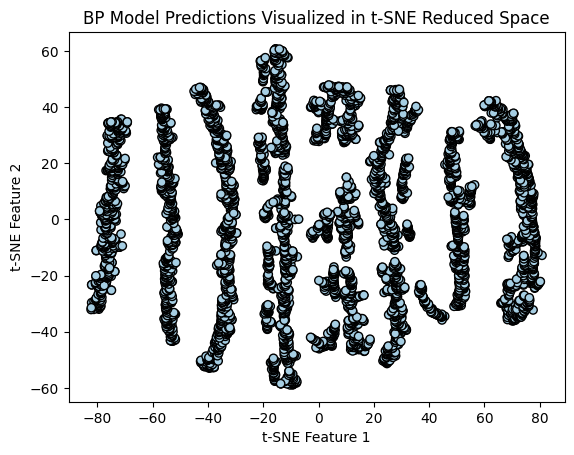

In [40]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Dimensionality Reduction using t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_reduced = tsne.fit_transform(X_bank)

y_pred = bp_model.predict(X_bank)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred_classes, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('BP Model Predictions Visualized in t-SNE Reduced Space')
plt.show()

In [44]:
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

def create_bp_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Adjust the last layer based on your problem
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

kf = KFold(n_splits=5)  
accuracies = []

for train_index, val_index in kf.split(X_bank):
    
    X_train, X_val = X_bank[train_index], X_bank[val_index]
    y_train, y_val = y_bank[train_index], y_bank[val_index]

    model = create_bp_model(X_train.shape[1])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    _, accuracy = model.evaluate(X_val, y_val, verbose=0)
    accuracies.append(accuracy)

# Calculate the average performance across all folds
average_accuracy = np.mean(accuracies)
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.49220000505447387
